In [22]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import numpy as np
from numpy.linalg import norm
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from random import seed
from random import random


In [23]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
np.random.seed(42)

w1 = np.random.rand()
w3 = np.random.rand()
w2 = np.random.rand()
w4 = np.random.rand()

print(np.array([[w1,w2],[w3,w4]]))

[[0.37454012 0.73199394]
 [0.95071431 0.59865848]]


In [25]:
# This funtion generates data 
def data_generator(n):
    np.random.seed(42)
    As = []   #2x2   XA.  AX
    x = np.random.normal(0,1,size = (2,n)) # n is the size of sample
    noise = np.random.normal(0,0.04**2) 
    
    for condition_number in [1,0.1,0.01,0.0001]: # create a list of As with different conditional number
        A = np.matrix([[1, 1], [1, 1+condition_number]])
        As.append(A)
        
    x = x.T    
    y1 = np.dot(x,As[0].T) + 0.01*noise #compute y with different A
    y01 = np.dot(x,As[1].T) + 0.01*noise
    y001 = np.dot(x,As[2].T) + 0.01*noise
    y0001 = np.dot(x,As[3].T) + 0.01*noise
    
    x = torch.Tensor(x).float() #convert all ndarrays to tensors
    y1 = torch.Tensor(y1).float()
    y01 = torch.Tensor(y01).float()
    y001 = torch.Tensor(y001).float()
    y0001 = torch.Tensor(y0001).float()
#     print(x)
#     print(y1.size())
    
    return x, y1, y01, y001, y0001    

In [26]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2,bias = False) #initializing nodes
        self.fc1.weight.data = torch.from_numpy(np.array([[w1,w2],[w3,w4]]))

    def forward(self, x):
        output = self.fc1(x) 
        return output

model = NN()
model = model.float()
optimizer = optim.SGD(model.parameters(), lr=0.03) #SGD = Stochastic Gradient Decscent, lr = learning rate

In [27]:
def calculate_loss(outputs,train_y):
    loss = (torch.norm(train_y-outputs))**2 * (1/train_y.shape[0]) #norm
    return loss

In [31]:
# use this function to run the neural network
def run_net(train_x,train_y,epochs): 
    epochs = epochs
    train_loss = []
    weightlist = []
    batch_size = len(train_x) # set batch size to the length of data

    for epoch in range(epochs):
        optimizer.zero_grad() 
        outputs = model.forward(train_x)  #feed data to get prediction
        loss = calculate_loss(outputs,train_y)
        train_loss.append(loss)
        model.zero_grad()#clear the gradients
        loss.backward() #calculate gradients
        optimizer.step() #update the weights
        if epoch >= 300:
                weightlist.append(list(model.parameters())[0].detach().numpy())
        
       
    return train_loss,weightlist

In [ ]:
def main(n,epochs):
    
    np.random.seed(42)
    train_x_all, train_y_1,train_y_01,train_y_001,train_y_0001= data_generator(n) # fetch the data 
    
    list_1 = run_net(train_x_all,train_y_1,epochs) #collecting the loss and put them in to according list
    print(list(model.parameters()))
    list_01 = run_net(train_x_all,train_y_01,epochs)
    print(list(model.parameters()))
    list_001 = run_net(train_x_all,train_y_001,epochs)
    print(list(model.parameters()))
    list_0001 = run_net(train_x_all,train_y_0001,epochs)  
    print(list(model.parameters()))
    
    # plot 3000 epochs and the losses
    epochs = 3000
    plt.suptitle('Simple Forward_net - pytorch')
    plt.plot(range(epochs),list_1)
    plt.plot(range(epochs),list_01)
    plt.plot(range(epochs),list_001)
    plt.plot(range(epochs),list_0001)
#     x1,x2,y1,y2 = plt.axis()
#     plt.axis((x1,x2,0,0.1))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend(['1', '0.1', '0.01', '0.001'], loc='upper right')
    plt.show()

#     plot the first 1000 epochs
    epochs = 1000
    plt.suptitle('Simple Forward_net - pytorch')
    plt.plot(range(epochs),list_1[:1000])
    plt.plot(range(epochs),list_01[:1000])
    plt.plot(range(epochs),list_001[:1000])
    plt.plot(range(epochs),list_0001[:1000])
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0,0.1))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend(['1', '0.1', '0.01', '0.001'], loc='upper right')
    plt.show()

In [38]:
def inverse_main(n,epochs):
    np.random.seed(42)
    
    train_x_all, train_y_1,train_y_01,train_y_001,train_y_0001= data_generator(n) # create the data 
    
    
    list_1,w_list_1 = run_net(train_y_1, train_x_all,epochs)
    print("~"*50)
    print(list(model.parameters()))
    mean = np.sum(w_list_1,axis=0)/len(w_list_1)
    mean0fsquared_w = np.sum(np.square(w_list_1),axis=0)/len(w_list_1)
        
    #print("~"*50)
    print("MEAN------",mean)
    print("VARIENCE------",mean0fsquared_w-np.square(mean))

    list_01,w_list_01 = run_net(train_y_01, train_x_all,epochs)
    print("~"*50)
    print(list(model.parameters()))
    mean = np.sum(w_list_01,axis=0)/len(w_list_01)
    mean0fsquared_w = np.sum(np.square(w_list_01),axis=0)/len(w_list_01)
        
    #print("~"*50)
    print("MEAN------",mean)
    print("VARIENCE------",mean0fsquared_w-np.square(mean))

    list_001,w_list_001 = run_net(train_y_001, train_x_all,epochs)
    print("~"*50)
    print(list(model.parameters()))
    mean = np.sum(w_list_001,axis=0)/len(w_list_001)
    mean0fsquared_w = np.sum(np.square(w_list_001),axis=0)/len(w_list_001)
        
    #print("~"*50)
    print("MEAN------",mean)
    print("VARIENCE------",mean0fsquared_w-np.square(mean))

    list_0001,w_list_0001 = run_net(train_y_0001, train_x_all,epochs) 
    print("~"*50)
    print(list(model.parameters()))
    mean = np.sum(w_list_0001,axis=0)/len(w_list_0001)
    mean0fsquared_w = np.sum(np.square(w_list_0001),axis=0)/len(w_list_0001)
        
    #print("~"*50)
    print("MEAN------",mean)
    print("VARIENCE------",mean0fsquared_w-np.square(mean))
    
#     for w in [w_list_1,w_list_01,w_list_001,w_list_0001]:
#         mean = np.sum(w,axis=0)/len(w)
#         mean0fsquared_w = np.sum(np.square(w),axis=0)/len(w)
        
#         print("~"*50)
#         print("MEAN------",mean)
#         print("VARIENCE------",mean0fsquared_w-np.square(mean))
    
    # plot 3000 epochs and the losses
    epochs = 3000
    plt.suptitle('Simple Inverse_net - pytorch')
    plt.plot(range(epochs),list_1)
    plt.plot(range(epochs),list_01)
    plt.plot(range(epochs),list_001)
    plt.plot(range(epochs),list_0001)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0,14))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend(['1', '0.1', '0.01', '0.0001'], loc='upper right')
    plt.show()

In [ ]:
main(10000,3000)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[Parameter containing:
tensor([[ 2.0000, -1.0000],
        [-1.0000,  1.0000]], requires_grad=True)]
MEAN------ [[ 2.0000007 -1.0000004]
 [-1.0000004  1.0000004]]
VARIENCE------ [[2.3841858e-06 7.1525574e-07]
 [7.1525574e-07 4.7683716e-07]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[Parameter containing:
tensor([[ 5.0239, -4.3147],
        [-4.0239,  4.3147]], requires_grad=True)]
MEAN------ [[ 5.0241194 -4.314715 ]
 [-4.023805   4.314715 ]]
VARIENCE------ [[-0.00246048  0.00040245]
 [ 0.00067711  0.00040245]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[Parameter containing:
tensor([[ 5.3654, -4.8412],
        [-4.3654,  4.8412]], requires_grad=True)]
MEAN------ [[ 5.3652864 -4.8411117]
 [-4.3652983  4.8411117]]
VARIENCE------ [[1.9435883e-03 1.1520386e-03]
 [8.3923340e-05 1.1425018e-03]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[Parameter containing:
tensor([[ 5.3583, -4.8569],
        [-4.3583,  4.8569]], r

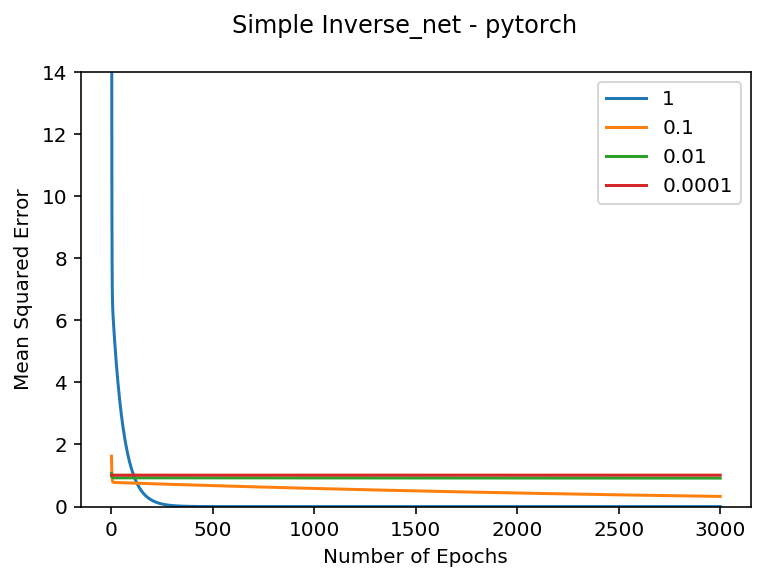

In [39]:
inverse_main(10000,3000)

In [21]:
list(model.parameters())[0].detach().numpy()

array([[ 5.358304 , -4.856885 ],
       [-4.358305 ,  4.8568854]], dtype=float32)